In [1]:
from fastai.vision import *

## Data Collection 

In [90]:
# URLs.CIFAR_100

# path = untar_data(URLs.CIFAR_100); path
path = Path('/datasets/fastai/imagenette2-160')

In [91]:
fnames = get_image_files(path, recurse=True); fnames[:5]

[PosixPath('/datasets/fastai/imagenette2-160/val/n03028079/ILSVRC2012_val_00034021.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/val/n03028079/n03028079_31602.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/val/n03028079/n03028079_2782.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/val/n03028079/n03028079_50060.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/val/n03028079/n03028079_13981.JPEG')]

In [92]:
not_meme = random.choices(fnames, k=1000); not_meme[:5]

[PosixPath('/datasets/fastai/imagenette2-160/train/n02102040/ILSVRC2012_val_00018207.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/train/n03888257/n03888257_4904.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/train/n02979186/n02979186_5266.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/train/n03888257/n03888257_23233.JPEG'),
 PosixPath('/datasets/fastai/imagenette2-160/train/n03445777/n03445777_6594.JPEG')]

In [2]:
classes = ['meme', 'not_meme']

In [5]:
folder = Path('/storage/meme_classifier/train')
dest = folder/classes[1]
dest.mkdir(parents=True, exist_ok=True)
file = 'not_meme.csv'

In [97]:
for file in not_meme: shutil.copy(file, dest)

In [ ]:
dest = folder/classes[0]
dest.mkdir(parents=True, exist_ok=True)
file = 'memes.csv'
download_images(folder/file, dest, max_pics=1000)

In [98]:
for c in classes:
    print(c)
    verify_images(folder/c, delete=True, max_size=500)

meme


not_meme


## Create test set

In [6]:
path = Path('/storage/meme_classifier')
dest = path/'test'
dest.mkdir(parents=True, exist_ok=True)
not_meme_test = random.sample(get_image_files(folder/'not_meme'), k=472); not_meme_test[:5]

[PosixPath('/storage/meme_classifier/train/not_meme/n03000684_17272.JPEG'),
 PosixPath('/storage/meme_classifier/train/not_meme/n01440764_9428.JPEG'),
 PosixPath('/storage/meme_classifier/train/not_meme/n01440764_26775.JPEG'),
 PosixPath('/storage/meme_classifier/train/not_meme/n03417042_23067.JPEG'),
 PosixPath('/storage/meme_classifier/train/not_meme/n03417042_3171.JPEG')]

In [7]:
meme_test = random.sample(get_image_files(folder/'meme'), k=123); meme_test[:5]

[PosixPath('/storage/meme_classifier/train/meme/00000553.jpg'),
 PosixPath('/storage/meme_classifier/train/meme/00000317.jpg'),
 PosixPath('/storage/meme_classifier/train/meme/00000576.jpg'),
 PosixPath('/storage/meme_classifier/train/meme/00000166.jpg'),
 PosixPath('/storage/meme_classifier/train/meme/00000444.jpg')]

In [161]:
for file in not_meme_test: shutil.move(str(file), dest)

for file in meme_test: shutil.move(str(file), dest)

In [98]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid_pct=0.2, test="test",
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=64).normalize(imagenet_stats)

In [99]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(['meme', 'not_meme'], 2, 800, 200, 595)

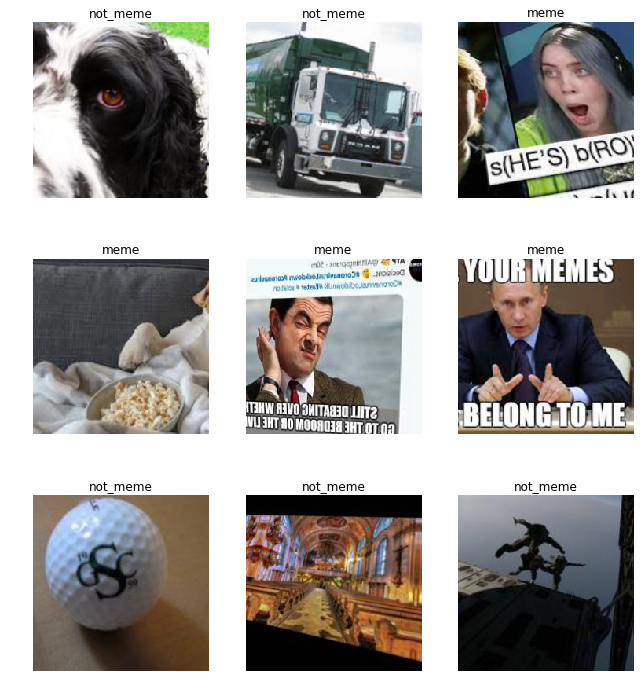

In [100]:
data.show_batch(rows=3, figsize=(9,10))

## Training Model

In [101]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [102]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.555233,0.333063,0.060000,00:07
1,0.298842,0.136123,0.040000,00:07


In [103]:
learn.save('stage-1')

In [104]:
learn.validate(learn.data.valid_dl)

[0.1361228, tensor(0.0400)]

In [105]:
learn.validate(learn.data.train_dl)

[0.03955627, tensor(0.0117)]

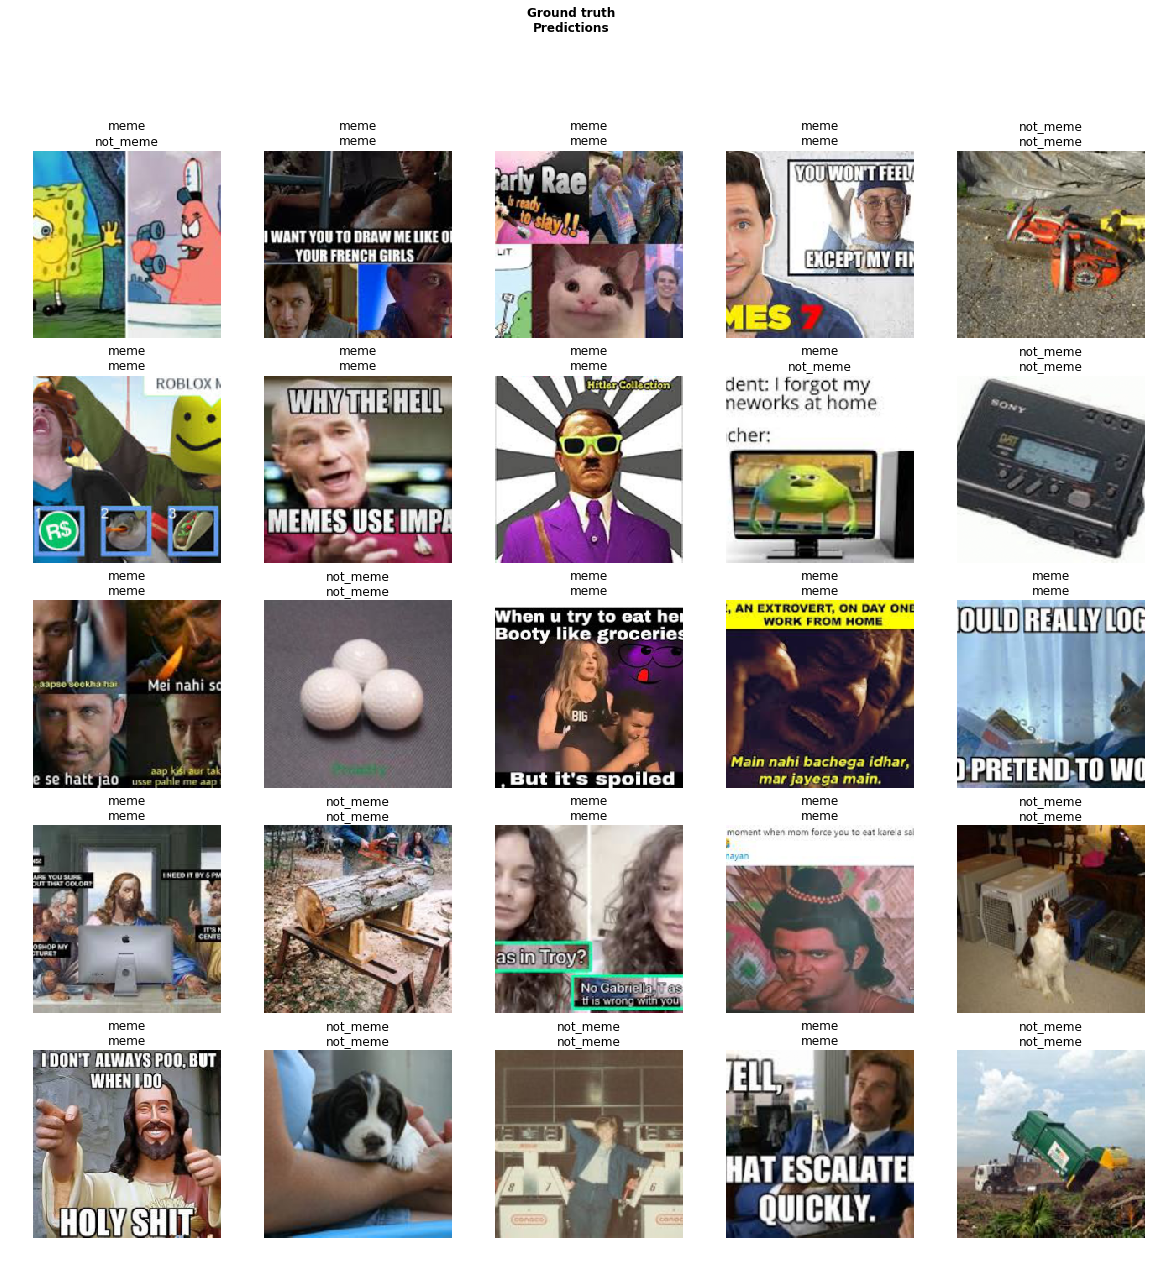

In [47]:
learn.show_results(ds_type=DatasetType.Valid)

In [106]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [79]:
DatasetType.Test??

In [109]:
pd.Series(preds[1]).value_counts()

0    595
dtype: int64

In [108]:
data.classes

['meme', 'not_meme']

In [97]:
preds[0].shape

torch.Size([595, 2])